In [1]:
pip install -U vnstock

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install ta

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install keras-self-attention

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
from ta.momentum import RSIIndicator
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, RNN, concatenate
from tensorflow.keras.optimizers import RMSprop
from vnstock import *
from ta.volatility import BollingerBands
from tensorflow.keras.layers import Layer
import tensorflow as tf
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, Flatten, BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
# from scikeras.wrappers import KerasClassifier

from ta.momentum import StochasticOscillator
from ta.volume import OnBalanceVolumeIndicator
from ta.trend import CCIIndicator
from sklearn.preprocessing import StandardScaler
from ta.volume import ChaikinMoneyFlowIndicator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import regularizers
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.saving import register_keras_serializable
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [8]:
from vnstock import *
import pandas as pd
import os
from collections import Counter
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.metrics import log_loss

In [12]:
from xgboost import XGBClassifier

In [13]:
import optuna

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [14]:
import joblib

In [15]:
def dataframe_to_x_y(df, feature, target):
  X_train, y_train = [], []
  X_val, y_val = [], []
  n = len(df)
  split_index = int(n * 0.8)
  X_train = df[feature][:split_index]
  y_train = df[target][:split_index]
  X_val = df[feature][split_index:]
  y_val = df[target][split_index:]
  return X_train, y_train, X_val, y_val

In [16]:

sentiment_columns = [
        'Reputation', 'Company Communication', 'Appointment', 'Financial', 'Regulatory',
        'Sales', 'M&A', 'Legal', 'Dividend Policy', 'Risks', 'Rumors', 'Strategy',
        'Options', 'IPO', 'Signal', 'Coverage', 'Fundamentals', 'Insider Activity',
        'Price Action', 'Buyside', 'Technical Analysis', 'Trade', 'Central Banks',
        'Currency', 'Conditions', 'Market', 'Volatility', 'Investor Sentiment', 'Retail Investor Behavior',
        'Speculation', 'Domestic Institutional Behavior', 'Foreign Institutional Behavior', 'Black Swan Event',
    ]

sentiment_p1d_columns = [
        'reputation_p1d', 'company_communication_p1d', 'appointment_p1d', 'financial_p1d', 'regulatory_p1d',
        'sales_p1d', 'm&a_p1d', 'legal_p1d', 'dividend_policy_p1d', 'risks_p1d', 'rumors_p1d', 'strategy_p1d',
        'options_p1d', 'ipo_p1d', 'signal_p1d', 'coverage_p1d', 'fundamentals_p1d', 'insider_activity_p1d',
        'price_action_p1d', 'buyside_p1d', 'technical_analysis_p1d', 'trade_p1d', 'central_banks_p1d',
        'currency_p1d', 'conditions_p1d', 'market_p1d', 'volatility_p1d', 'investor_sentiment_p1d', 'retail_investor_behavior_p1d',
        'speculation_p1d', 'domestic_institutional_behavior_p1d', 'foreign_institutional_behavior_p1d', 'black_swan_event_p1d',
    ]
meta_cols = ['num_sa_news', 'mean_sentiment_norm', 'max_sentiment_norm', 'std_sentiment_score', 'sum_positive_sa', 'sum_negative_sa', 'time_distance_from_sa_to_close_minutes']
meta_p1d_cols = ['num_sa_news_p1d', 'mean_sentiment_norm_p1d', 'max_sentiment_norm_p1d', 'std_sentiment_score_p1d', 'sum_positive_sa_p1d', 'sum_negative_sa_p1d', 'time_distance_from_sa_to_close_minutes_p1d']

sentiment_feature_selected =  sentiment_columns + sentiment_p1d_columns + meta_cols + meta_p1d_cols
ta_features = ['volume_ma','volume_to_volume_ma_ratio','ema_12','ema_26','sma_20','sma_50','roc_5','roc_1','roc_9','%K','%R','cci','obv','macd','signal_line','macd_histogram','rsi','rsi_base_ma','rsi_rsi_base_ma_ratio','bb_bbm','bb_bbh','bb_bbl','bb_bbp','bb_bbh_bb_bbl_ratio','hl_ratio', 'co_ratio', 'price_range', 'sma_ratio_20_50', 'ema_ratio_12_26', 'bb_width', 'bb_position', 'rsi_overbought', 'rsi_oversold', 'rsi_neutral', 'macd_bullish', 'momentum_5', 'momentum_10','log_return','volatility_5d','volatility_10d','volatility_20d','volatility_30d','mean_log_return_5d','mean_log_return_10d','mean_log_return_20d','mean_log_return_30d','sharpe_like_5d','sharpe_like_10d','sharpe_like_20d','sharpe_like_30d','up_streak','pos_log_return_ratio_20d','z_score_5d','z_score_10d','z_score_20d','z_score_30d','annual_return','daily_return','sharpe_ratio',
               'rsi_vn30','rsi_base_ma_vn30','rsi_rsi_base_ma_ratio_vn30','volume_ma_vn30','volume_to_volume_ma_ratio_vn30','bb_bbm_vn30','bb_bbh_vn30','bb_bbl_vn30','bb_bbp_vn30','bb_bbh_bb_bbl_ratio_vn30','roc_1_vn30', 'roc_5_vn30', 'roc_9_vn30','%K_vn30','%R_vn30','cci_vn30','obv_vn30','ema_12_vn30','ema_26_vn30','sma_20_vn30','sma_50_vn30', 'hl_ratio_vn30', 'co_ratio_vn30', 'price_range_vn30', 'sma_ratio_20_50_vn30', 'ema_ratio_12_26_vn30', 'bb_width_vn30', 'bb_position_vn30', 'rsi_overbought_vn30', 'rsi_oversold_vn30', 'rsi_neutral_vn30', 'momentum_5_vn30', 'momentum_10_vn30', 'log_return_vn30','volatility_5d_vn30','volatility_10d_vn30','volatility_20d_vn30','volatility_30d_vn30','mean_log_return_5d_vn30','mean_log_return_10d_vn30','mean_log_return_20d_vn30','mean_log_return_30d_vn30','sharpe_like_5d_vn30','sharpe_like_10d_vn30','sharpe_like_20d_vn30','sharpe_like_30d_vn30','up_streak_vn30','pos_log_return_ratio_20d_vn30','z_score_5d_vn30','z_score_10d_vn30','z_score_20d_vn30','z_score_30d_vn30','annual_return_vn30','daily_return_vn30','sharpe_ratio_vn30',
               'rsi_vni','rsi_base_ma_vni','rsi_rsi_base_ma_ratio_vni','volume_ma_vni','volume_to_volume_ma_ratio_vni','bb_bbm_vni','bb_bbh_vni','bb_bbl_vni','bb_bbp_vni','bb_bbh_bb_bbl_ratio_vni','roc_1_vni', 'roc_5_vni', 'roc_9_vni','%K_vni','%R_vni','cci_vni','obv_vni','ema_12_vni','ema_26_vni','sma_20_vni','sma_50_vni', 'hl_ratio_vni', 'co_ratio_vni', 'price_range_vni', 'sma_ratio_20_50_vni', 'ema_ratio_12_26_vni', 'bb_width_vni', 'bb_position_vni', 'rsi_overbought_vni', 'rsi_oversold_vni', 'rsi_neutral_vni', 'momentum_5_vni', 'momentum_10_vni','log_return_vni','volatility_5d_vni','volatility_10d_vni','volatility_20d_vni','volatility_30d_vni','mean_log_return_5d_vni','mean_log_return_10d_vni','mean_log_return_20d_vni','mean_log_return_30d_vni','sharpe_like_5d_vni','sharpe_like_10d_vni','sharpe_like_20d_vni','sharpe_like_30d_vni','up_streak_vni','pos_log_return_ratio_20d_vni','z_score_5d_vni','z_score_10d_vni','z_score_20d_vni','z_score_30d_vni','annual_return_vni','daily_return_vni','sharpe_ratio_vni']
fa_features = ['p/b_previous_quarter', 'p/b_change_rate','p/b_change_rate_flag','p/e_previous_quarter','p/e_change_rate','p/e_change_rate_flag','p/s_previous_quarter','p/s_change_rate','p/s_change_rate_flag','p/cash_flow_previous_quarter','p/cash_flow_change_rate','p/cash_flow_change_rate_flag','eps_previous_quarter','eps_change_rate', 'eps_change_rate_flag','bvps_previous_quarter','bvps_change_rate', 'bvps_change_rate_flag','roe_previous_quarter','roe_change_rate','roe_change_rate_flag','roa_previous_quarter','roa_change_rate','roa_change_rate_flag','coefficient_p/b','coefficient_p/e','coefficient_p/s','coefficient_p/cash_flow','coefficient_eps','coefficient_bvps','coefficient_roe','coefficient_roa','distance_to_nearest_quarter']
ta_fa_feature_selected = ta_features + fa_features
features = ta_fa_feature_selected + sentiment_feature_selected
target = 'target'
scaler = StandardScaler()

In [17]:
def load_data_for_analysis(tickers, folder_path):

    df_all = []

    for ticker in tickers:
        file_path = os.path.join(folder_path, f"{ticker}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path)
            df["ticker"] = ticker  # thêm cột ticker
            df_all.append(df)
        else:
            print(f"⚠️ Không tìm thấy: {file_path}")

    # Gộp lại thành 1 DataFrame
    df_global = pd.concat(df_all, ignore_index=True)
    print(f"✅ Đã load xong {len(df_global)} dòng dữ liệu từ {len(df_all)} cổ phiếu.")
    return df_global

In [18]:
tickers = ['ACB', 'BCM', 'BID','BVH','CTG','FPT','GAS','GVR','HDB','HPG',
                    'LPB','MBB','MSN','MWG','PLX','SAB','SHB','SSB','SSI','STB',
                    'TCB','TPB','VCB','VHM','VIB','VIC','VJC','VNM','VPB','VRE']
folder_path_train = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\out_performance_vn30\train_data" 
folder_path_test = r"D:\thacsi\TAILIEULUANVAN\code\PredictStock_TA_FA_SA\TA_FA_SA\data\v6\out_performance_vn30\test_data" 
df_global_train = load_data_for_analysis(tickers, folder_path_train)
df_global_test = load_data_for_analysis(tickers, folder_path_test)


✅ Đã load xong 35865 dòng dữ liệu từ 30 cổ phiếu.
✅ Đã load xong 7380 dòng dữ liệu từ 30 cổ phiếu.


In [19]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [20]:
from sklearn.metrics import (
    f1_score, accuracy_score, classification_report, roc_auc_score,
    roc_curve, auc
)
from sklearn.preprocessing import label_binarize

In [21]:
def evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test, model_dict):

    f1_weighted_scores = []
    f1_micro_scores = []
    acc_scores = []
    auc_micro_scores = []
    auc_weighted_scores = []
    model_names = list(model_dict.keys())

    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    roc_data = {}

    for name in model_names:
        base_model = model_dict[name]
        model_class = base_model.__class__
        model_params = base_model.get_params()
        model = model_class(**model_params)

        # Cross-validation F1 weighted
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
        print(f"{name} CV F1 (weighted): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)

        # F1 Scores
        f1_weighted = f1_score(y_test, y_pred, average='weighted')
        f1_micro = f1_score(y_test, y_pred, average='micro')
        acc = accuracy_score(y_test, y_pred)

        print(f"{name} Test F1 (weighted): {f1_weighted:.4f}")
        print(f"{name} Test F1 (micro)   : {f1_micro:.4f}")
        print(f"{name} Test Accuracy     : {acc:.4f}")
        print(classification_report(y_test, y_pred))

        try:
            roc_auc_micro = roc_auc_score(y_test_bin, y_proba, average='micro', multi_class='ovr')
            roc_auc_weighted = roc_auc_score(y_test_bin, y_proba, average='weighted', multi_class='ovr')
            print(f"{name} ROC AUC (micro ovr): {roc_auc_micro:.4f}")
            print(f"{name} ROC AUC (weighted ovr): {roc_auc_weighted:.4f}")
        except ValueError:
            print(f"{name} ROC AUC could not be computed (possibly due to only one class present in y_test)")
            roc_auc_micro = np.nan
            roc_auc_weighted = np.nan

        # Lưu dữ liệu để vẽ
        fpr = {}
        tpr = {}
        roc_auc_class = {}
        for i, cls in enumerate(classes):
            fpr[cls], tpr[cls], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc_class[cls] = auc(fpr[cls], tpr[cls])
        roc_data[name] = {"fpr": fpr, "tpr": tpr, "auc": roc_auc_class}

        # Lưu điểm số
        f1_weighted_scores.append(f1_weighted)
        f1_micro_scores.append(f1_micro)
        acc_scores.append(acc)
        auc_micro_scores.append(roc_auc_micro)
        auc_weighted_scores.append(roc_auc_weighted)

    return model_names, f1_weighted_scores, f1_micro_scores, acc_scores, auc_micro_scores, auc_weighted_scores, roc_data


In [25]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

In [26]:
X_train_no_sa = df_global_train[ta_fa_feature_selected]
X_test_no_sa = df_global_test[ta_fa_feature_selected]
y_train = df_global_train[target]
y_test = df_global_test[target]

In [27]:
print("Đánh giá với bộ feature không có SA (chỉ ta + fa)")
scaler = StandardScaler()
X_train_no_sa_scaled = scaler.fit_transform(X_train_no_sa)
X_test_no_sa_scaled = scaler.transform(X_test_no_sa)      

model_names, f1_weighted_scores_no_sa, f1_micro_scores_no_sa, acc_scores_no_sa, auc_micro_scores_no_sa, auc_weighted_scores, roc_data_no_sa = evaluate_models(X_train_no_sa_scaled, X_test_no_sa_scaled, y_train, y_test, models)

Đánh giá với bộ feature không có SA (chỉ ta + fa)
Random Forest CV F1 (weighted): 0.4917 ± 0.0127
Random Forest Test F1 (weighted): 0.5774
Random Forest Test F1 (micro)   : 0.6931
Random Forest Test Accuracy     : 0.6931
              precision    recall  f1-score   support

           0       0.37      0.01      0.03      1164
           1       0.70      0.99      0.82      5118
           2       0.42      0.02      0.04      1098

    accuracy                           0.69      7380
   macro avg       0.50      0.34      0.29      7380
weighted avg       0.60      0.69      0.58      7380

Random Forest ROC AUC (micro ovr): 0.8043
Random Forest ROC AUC (weighted ovr): 0.6049
XGBoost CV F1 (weighted): 0.4897 ± 0.0152


[14:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5919
XGBoost Test F1 (micro)   : 0.6775
XGBoost Test Accuracy     : 0.6775
              precision    recall  f1-score   support

           0       0.27      0.06      0.10      1164
           1       0.71      0.95      0.81      5118
           2       0.29      0.06      0.10      1098

    accuracy                           0.68      7380
   macro avg       0.42      0.36      0.34      7380
weighted avg       0.58      0.68      0.59      7380

XGBoost ROC AUC (micro ovr): 0.8042
XGBoost ROC AUC (weighted ovr): 0.6114
LightGBM CV F1 (weighted): 0.4802 ± 0.0125
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45312
[LightGBM] [Info] Number of data points in the train set: 35865, number of used features: 202
[LightGBM] [Info] Start training from score -1.522694
[LightGBM] [Info] Start training from score -0.5584

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5848
AdaBoost Test F1 (micro)   : 0.6927
AdaBoost Test Accuracy     : 0.6927
              precision    recall  f1-score   support

           0       0.33      0.03      0.05      1164
           1       0.70      0.99      0.82      5118
           2       0.43      0.03      0.06      1098

    accuracy                           0.69      7380
   macro avg       0.49      0.35      0.31      7380
weighted avg       0.60      0.69      0.58      7380

AdaBoost ROC AUC (micro ovr): 0.8093
AdaBoost ROC AUC (weighted ovr): 0.6164


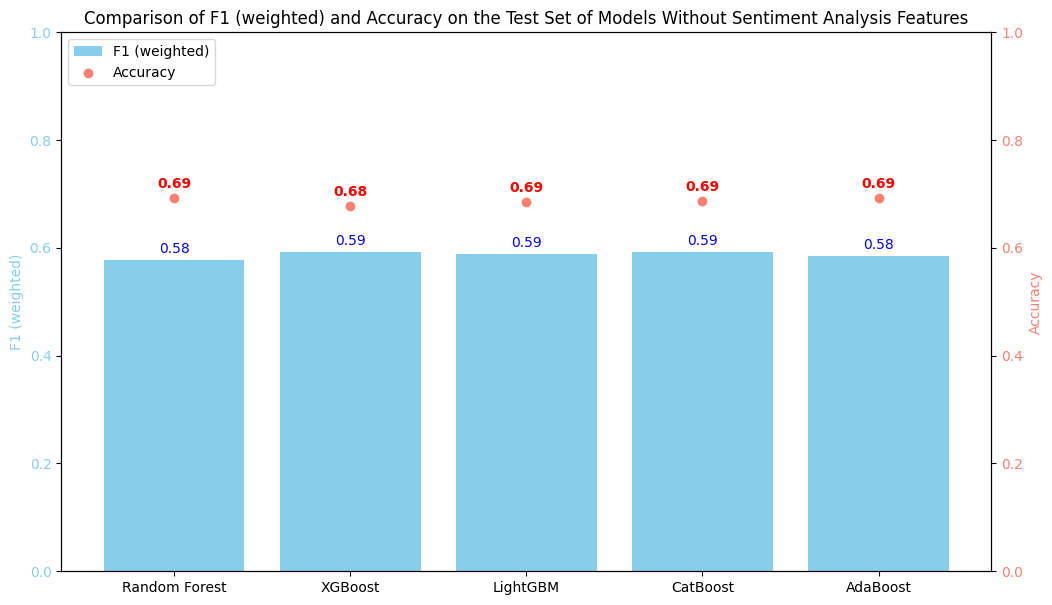

In [28]:
x = np.arange(len(model_names))  # vị trí trục x

fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ biểu đồ cột cho F1
bars = ax1.bar(x, f1_weighted_scores_no_sa, color='skyblue', label='F1 (weighted)')
ax1.set_ylabel('F1 (weighted)', color='skyblue')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.tick_params(axis='y', labelcolor='skyblue')

# Tạo trục y phụ để vẽ Accuracy (nếu muốn)
ax2 = ax1.twinx()  
# ax2.plot(x, acc_scores_no_sa, color='salmon', marker='o', linewidth=2, label='Accuracy')
ax2.scatter(x, acc_scores_no_sa, color='salmon', label='Accuracy', zorder=5)
ax2.set_ylabel('Accuracy', color='salmon')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='salmon')

# Thêm tiêu đề và legend
plt.title("Comparison of F1 (weighted) and Accuracy on the Test Set of Models Without Sentiment Analysis Features")

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

# Hiển thị giá trị F1 trên cột bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='blue')

# Hiển thị giá trị Accuracy trên từng điểm đường line
for i, acc_value in enumerate(acc_scores_no_sa):
    ax2.annotate(f'{acc_value:.2f}',
                 xy=(x[i], acc_value),
                 xytext=(0, 5),  # dời lên trên 5 points cho rõ
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red',
                 fontsize=10,
                 fontweight='bold')

plt.show()

In [29]:
X_train_with_sa = df_global_train[features]  # features = ta + fa + sa
X_test_with_sa = df_global_test[features]
y_train = df_global_train[target]
y_test = df_global_test[target]

scaler = StandardScaler()
X_train_with_sa_scaled = scaler.fit_transform(X_train_with_sa)   # Fit scaler trên train, scale train luôn
X_test_with_sa_scaled = scaler.transform(X_test_with_sa)  

In [30]:
# Đánh giá với bộ feature có SA (ta + fa + sa)
print("Đánh giá với bộ feature có SA (chỉ ta + fa +sa)")
X_train_with_sa = df_global_train[features]  # features = ta + fa + sa
X_test_with_sa = df_global_test[features]

scaler = StandardScaler()
X_train_with_sa_scaled = scaler.fit_transform(X_train_with_sa)   # Fit scaler trên train, scale train luôn
X_test_with_sa_scaled = scaler.transform(X_test_with_sa)  

model_names, f1_weighted_scores_with_sa, f1_micro_scores_with_sa, acc_scores_with_sa, auc_micro_scores_with_sa, auc_weighted_scores_with_sa,roc_data_with_sa = evaluate_models(X_train_with_sa_scaled, X_test_with_sa_scaled, y_train, y_test, models)

Đánh giá với bộ feature có SA (chỉ ta + fa +sa)
Random Forest CV F1 (weighted): 0.4933 ± 0.0128
Random Forest Test F1 (weighted): 0.5780
Random Forest Test F1 (micro)   : 0.6934
Random Forest Test Accuracy     : 0.6934
              precision    recall  f1-score   support

           0       0.34      0.01      0.02      1164
           1       0.70      0.99      0.82      5118
           2       0.47      0.02      0.04      1098

    accuracy                           0.69      7380
   macro avg       0.50      0.34      0.30      7380
weighted avg       0.61      0.69      0.58      7380

Random Forest ROC AUC (micro ovr): 0.8041
Random Forest ROC AUC (weighted ovr): 0.6033
XGBoost CV F1 (weighted): 0.4909 ± 0.0157


[14:32:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5950
XGBoost Test F1 (micro)   : 0.6753
XGBoost Test Accuracy     : 0.6753
              precision    recall  f1-score   support

           0       0.26      0.07      0.10      1164
           1       0.71      0.94      0.81      5118
           2       0.29      0.07      0.12      1098

    accuracy                           0.68      7380
   macro avg       0.42      0.36      0.34      7380
weighted avg       0.58      0.68      0.59      7380

XGBoost ROC AUC (micro ovr): 0.8078
XGBoost ROC AUC (weighted ovr): 0.6175
LightGBM CV F1 (weighted): 0.4844 ± 0.0136
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 48932
[LightGBM] [Info] Number of data points in the train set: 35865, number of used features: 282
[LightGBM] [Info] Start training from score -1.522694
[LightGBM] [Info] Start training from score -0.5584

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5870
AdaBoost Test F1 (micro)   : 0.6920
AdaBoost Test Accuracy     : 0.6920
              precision    recall  f1-score   support

           0       0.34      0.03      0.05      1164
           1       0.70      0.98      0.82      5118
           2       0.39      0.04      0.07      1098

    accuracy                           0.69      7380
   macro avg       0.48      0.35      0.32      7380
weighted avg       0.60      0.69      0.59      7380

AdaBoost ROC AUC (micro ovr): 0.8104
AdaBoost ROC AUC (weighted ovr): 0.6211


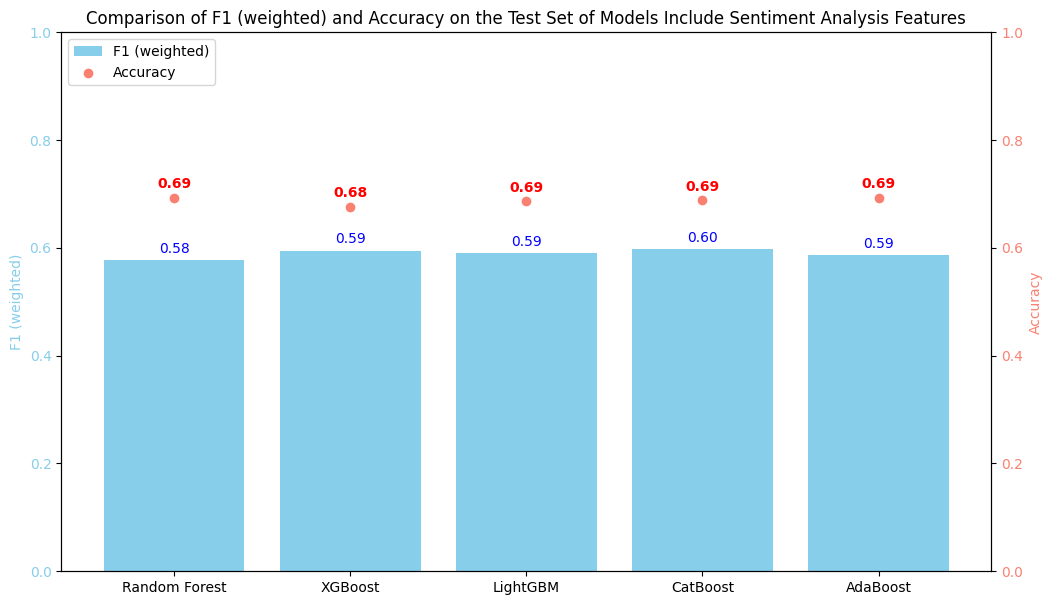

In [31]:
x = np.arange(len(model_names))  # vị trí trục x

fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ biểu đồ cột cho F1
bars = ax1.bar(x, f1_weighted_scores_with_sa, color='skyblue', label='F1 (weighted)')
ax1.set_ylabel('F1 (weighted)', color='skyblue')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.tick_params(axis='y', labelcolor='skyblue')

# Tạo trục y phụ để vẽ Accuracy (nếu muốn)
ax2 = ax1.twinx()  
# ax2.plot(x, acc_scores_with_sa, color='salmon', marker='o', linewidth=2, label='Accuracy')
ax2.scatter(x, acc_scores_with_sa, color='salmon', label='Accuracy', zorder=5)
ax2.set_ylabel('Accuracy', color='salmon')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='salmon')

# Thêm tiêu đề và legend
plt.title("Comparison of F1 (weighted) and Accuracy on the Test Set of Models Include Sentiment Analysis Features")

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

# Hiển thị giá trị F1 trên cột bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='blue')

# Hiển thị giá trị Accuracy trên từng điểm đường line
for i, acc_value in enumerate(acc_scores_with_sa):
    ax2.annotate(f'{acc_value:.2f}',
                 xy=(x[i], acc_value),
                 xytext=(0, 5),  # dời lên trên 5 points cho rõ
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red',
                 fontsize=10,
                 fontweight='bold')

plt.show()

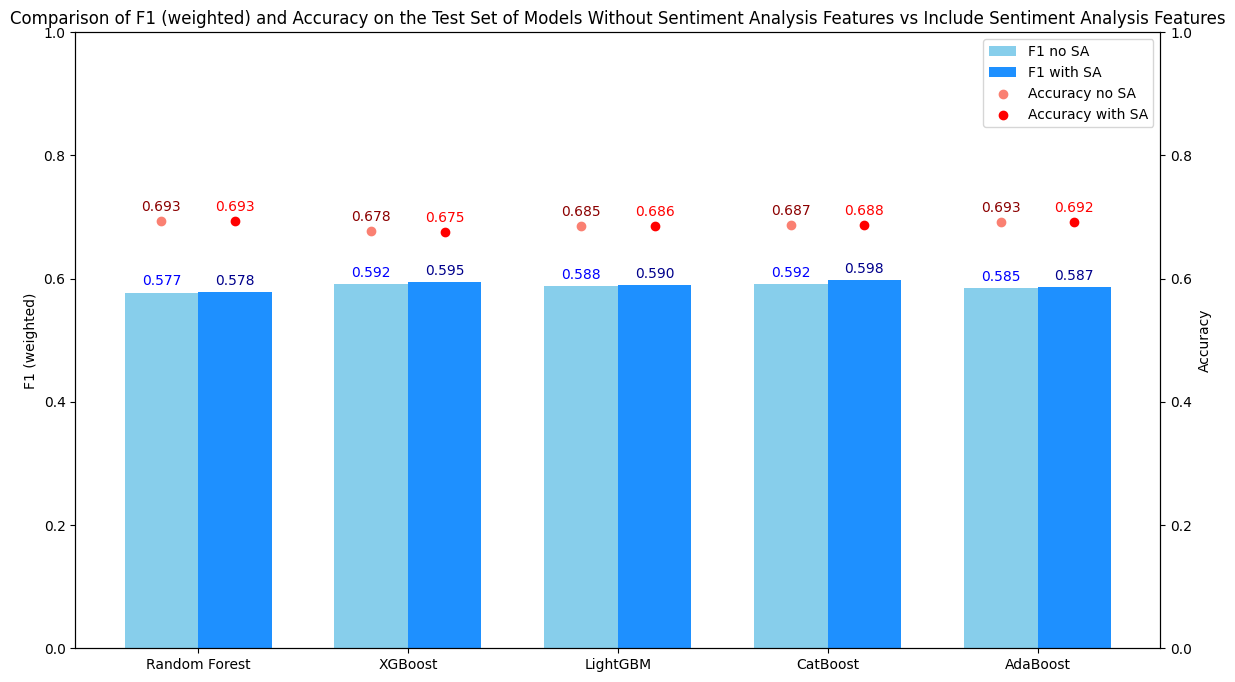

In [33]:
# Vẽ biểu đồ so sánh F1 và Accuracy giữa 2 bộ feature
x = np.arange(len(model_names))  # vị trí trục x
width = 0.35  # độ rộng cột

fig, ax1 = plt.subplots(figsize=(14, 8))

# Cột F1 no_sa và with_sa
bars1 = ax1.bar(x - width/2, f1_weighted_scores_no_sa, width, label='F1 no SA', color='skyblue')
bars2 = ax1.bar(x + width/2, f1_weighted_scores_with_sa, width, label='F1 with SA', color='dodgerblue')
ax1.set_ylabel('F1 (weighted)')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Trục y phụ cho Accuracy
ax2 = ax1.twinx()
# line1 = ax2.plot(x - width/2, acc_scores_no_sa, 'o-', color='salmon', label='Accuracy no SA')
# line2 = ax2.plot(x + width/2, acc_scores_with_sa, 'o-', color='red', label='Accuracy with SA')
line1 = ax2.scatter(x - width/2, acc_scores_no_sa, color='salmon', label='Accuracy no SA', zorder=5)
line2 = ax2.scatter(x + width/2, acc_scores_with_sa, color='red', label='Accuracy with SA', zorder=5)
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y')

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper right')

# Hiển thị giá trị trên từng cột bar và điểm line
def annotate_bars(bars, ax, color='black'):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color=color)

annotate_bars(bars1, ax1, 'blue')
annotate_bars(bars2, ax1, 'darkblue')

for i in range(len(x)):
    ax2.annotate(f'{acc_scores_no_sa[i]:.3f}',
                 xy=(x[i] - width/2, acc_scores_no_sa[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='darkred')
    ax2.annotate(f'{acc_scores_with_sa[i]:.3f}',
                 xy=(x[i] + width/2, acc_scores_with_sa[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red')

plt.title("Comparison of F1 (weighted) and Accuracy on the Test Set of Models Without Sentiment Analysis Features vs Include Sentiment Analysis Features")
plt.show()

In [ ]:
# ==============================================Tuning with create_dmvs_validation_set and loss ===============================================

In [34]:
from sklearn.model_selection import TimeSeriesSplit

In [35]:
def get_grouped_time_series_folds(df, ticker_col='ticker', n_splits=5):
    tickers = df[ticker_col].unique()
    fold_indices = [[] for _ in range(n_splits)]  # List chứa n_splits fold tổng
    for ticker in tickers:
        idx = df[df[ticker_col] == ticker].index.values
        tscv = TimeSeriesSplit(n_splits=n_splits)
        for fold_num, (train_idx, val_idx) in enumerate(tscv.split(idx)):
            # Gộp index thực tế vào fold tổng tương ứng
            fold_indices[fold_num].append((idx[train_idx], idx[val_idx]))
    # Gộp index của từng fold tổng lại thành mảng train/val duy nhất
    grouped_folds = []
    for fold in fold_indices:
        train_idx = np.concatenate([item[0] for item in fold])
        val_idx = np.concatenate([item[1] for item in fold])
        grouped_folds.append((train_idx, val_idx))
    return grouped_folds

In [36]:
folds = get_grouped_time_series_folds(df_global_train, ticker_col='ticker', n_splits=5)

In [37]:
X = X_train_with_sa_scaled  # hoặc X_train_with_sa_scaled nếu dùng cả SA
y = y_train

In [ ]:
# 3. Định nghĩa hàm objective cho Optuna
print("Tuning XGBClassifier with Optuna")
def objective_xgb(trial):
    params = {
        "n_estimators": 1000,
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "use_label_encoder": False,
        "eval_metric": "mlogloss",
        "random_state": 42,
        "device": "cuda",
    }

    losses = []
    for train_idx, val_idx in folds:
        X_train, X_val = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        model = XGBClassifier(**params)
        model.fit(X_train, y_train_fold, verbose=False)
        preds_proba = model.predict_proba(X_val)
        loss = log_loss(y_val_fold, preds_proba)
        losses.append(loss)
    mean_loss = np.mean(losses)
    print(f"Trial {trial.number}: loss={mean_loss:.5f}, params={trial.params}")
    return mean_loss

# 4. Chạy Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective_xgb, n_trials=50)

print("Best loss xgb:", study.best_value)
print("Best params xgb:", study.best_trial.params)

print("===============================================Tuning LightGBM with Optuna =====================================================")
# 3. Định nghĩa hàm objective cho Optuna
print("Tuning LightGBM with Optuna")
def objective_ligbm(trial):
    params = {
        "n_estimators": 1000,
        "max_depth": trial.suggest_int("max_depth", 5, 15),  # sâu hơn vì data lớn
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),  # thường học chậm
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 20, 100),  # min số mẫu ở lá cây
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),  # L1 regularization
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),  # L2 regularization
        "random_state": 42,
        "objective": "multiclass",
        "num_class": 3,
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        # "device": "cuda",  # Sử dụng GPU nếu có
        # "n_jobs": -1,  # Sử dụng tất cả CPU cores
        "class_weight": "balanced"  # Cân bằng trọng số lớp

    }

    losses = []
    for train_idx, val_idx in folds:
        X_train, X_val = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        model = LGBMClassifier(**params)
        model.fit(X_train, y_train_fold)
        preds_proba = model.predict_proba(X_val)
        loss = log_loss(y_val_fold, preds_proba)
        losses.append(loss)
    mean_loss = np.mean(losses)
    print(f"Trial {trial.number}: loss={mean_loss:.5f}, params={trial.params}")
    return mean_loss

# 4. Chạy Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective_ligbm, n_trials=50)

print("Best loss lightgbm:", study.best_value)
print("Best params lightgbm:", study.best_trial.params)

print("===============================================Tuning CatBoost with Optuna =====================================================")
# 3. Định nghĩa hàm objective cho Optuna
# 3. Định nghĩa hàm objective cho Optuna
print("Tuning CatBoost with Optuna")
def objective_catboost(trial):
    params = {
        "iterations": 1000,
        "depth": trial.suggest_int("depth", 5, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.03, 0.2, log=True),  # thường học chậm
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.2, 1.0),
        "random_strength": trial.suggest_float("random_strength", 0.2, 1.0),
        "border_count": trial.suggest_int("border_count", 64, 128),
        "task_type": "CPU",  # or "GPU" if available
        "verbose": 0,
        "loss_function": "MultiClass",
        "eval_metric": "MultiClass",    
        "random_seed": 42,
    }

    losses = []
    for train_idx, val_idx in folds:
        X_train, X_val = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
        model = CatBoostClassifier(**params)
        model.fit(X_train, y_train_fold)
        preds_proba = model.predict_proba(X_val)
        loss = log_loss(y_val_fold, preds_proba)
        losses.append(loss)
    mean_loss = np.mean(losses)
    print(f"Trial {trial.number}: loss={mean_loss:.5f}, params={trial.params}")
    return mean_loss

# 4. Chạy Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective_catboost, n_trials=50)

print("Best loss catboost:", study.best_value)
print("Best params catboost:", study.best_trial.params)


(35928, 308)

In [ ]:
# =====================================final compare===========================================

In [ ]:
best_hyperparameter_xgboot = {'max_depth': 9, 'learning_rate': 0.011632016671032095, 'subsample': 0.6860718729142917, 'colsample_bytree': 0.5959797122704581}
best_hyperparameter_lgbm = {'max_depth': 10, 'learning_rate': 0.04612517898854548, 'subsample': 0.6812467967705658, 'colsample_bytree': 0.7408542913499703, 'min_child_samples': 35, 'reg_alpha': 0.9605781376834349, 'reg_lambda': 0.9231336684438001}
best_hyperparameter_catBoost = {'depth': 7, 'learning_rate': 0.12729933474130783, 'l2_leaf_reg': 6.143840999264041, 'bagging_temperature': 0.4631814615219555, 'random_strength': 0.5361482250384189, 'border_count': 100}

In [ ]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(n_jobs=-1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(n_jobs=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost_Bayesian_Optimization": XGBClassifier(
        n_estimators=1000,  # giữ nguyên như trong objective
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        **best_hyperparameter_xgboot
    ),
    "LGBMC_Bayesian_Optimization":  LGBMClassifier(
        random_state = 42,
        objective= "multiclass",
        num_class = 3,
        metric = "multi_logloss",
        verbosity = -1,
        boosting_type = "gbdt",
        **best_hyperparameter_lgbm
    ),
    "CatBoost_Bayesian_Optimization": CatBoostClassifier(
        verbose = 0,
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        **best_hyperparameter_catBoost
    )

}

In [26]:
X_train_no_sa = df_global_train[ta_fa_feature_selected]
X_test_no_sa = df_global_test[ta_fa_feature_selected]
y_train = df_global_train[target]
y_test = df_global_test[target]

In [29]:
print("Đánh giá với bộ feature không có SA (chỉ ta + fa)")
scaler = StandardScaler()
X_train_no_sa_scaled = scaler.fit_transform(X_train_no_sa)
X_test_no_sa_scaled = scaler.transform(X_test_no_sa)      

model_names, f1_weighted, f1_micro, acc, auc_scores, roc_data = evaluate_models(X_train_no_sa_scaled, X_test_no_sa_scaled, y_train, y_test, models)

Đánh giá với bộ feature không có SA (chỉ ta + fa)
Random Forest CV F1 (weighted): 0.5156 ± 0.0064
Random Forest Test F1 (weighted): 0.5764
Random Forest Test F1 (micro)   : 0.6882
Random Forest Test Accuracy     : 0.6882
              precision    recall  f1-score   support

           0       0.28      0.03      0.05      1164
           1       0.70      0.98      0.82      5118
           2       0.31      0.01      0.02      1098

    accuracy                           0.69      7380
   macro avg       0.43      0.34      0.30      7380
weighted avg       0.57      0.69      0.58      7380

Random Forest ROC AUC (micro ovr): 0.7922
XGBoost CV F1 (weighted): 0.5018 ± 0.0056


[09:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5892
XGBoost Test F1 (micro)   : 0.6524
XGBoost Test Accuracy     : 0.6524
              precision    recall  f1-score   support

           0       0.24      0.12      0.16      1164
           1       0.71      0.90      0.79      5118
           2       0.24      0.06      0.10      1098

    accuracy                           0.65      7380
   macro avg       0.40      0.36      0.35      7380
weighted avg       0.56      0.65      0.59      7380

XGBoost ROC AUC (micro ovr): 0.7843
LightGBM CV F1 (weighted): 0.4905 ± 0.0066
LightGBM Test F1 (weighted): 0.5876
LightGBM Test F1 (micro)   : 0.6794
LightGBM Test Accuracy     : 0.6794
              precision    recall  f1-score   support

           0       0.27      0.06      0.09      1164
           1       0.70      0.96      0.81      5118
           2       0.28      0.04      0.07      1098

    accuracy                           0.68      7380
   macro avg       0.42      0.35      0.32      7380
w

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5791
AdaBoost Test F1 (micro)   : 0.6827
AdaBoost Test Accuracy     : 0.6827
              precision    recall  f1-score   support

           0       0.21      0.05      0.08      1164
           1       0.70      0.97      0.81      5118
           2       0.35      0.01      0.01      1098

    accuracy                           0.68      7380
   macro avg       0.42      0.34      0.30      7380
weighted avg       0.57      0.68      0.58      7380

AdaBoost ROC AUC (micro ovr): 0.7938
XGBoost_Bayesian_Optimization CV F1 (weighted): 0.5087 ± 0.0060


[09:37:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_Bayesian_Optimization Test F1 (weighted): 0.5866
XGBoost_Bayesian_Optimization Test F1 (micro)   : 0.6855
XGBoost_Bayesian_Optimization Test Accuracy     : 0.6855
              precision    recall  f1-score   support

           0       0.28      0.05      0.08      1164
           1       0.70      0.97      0.81      5118
           2       0.34      0.03      0.06      1098

    accuracy                           0.69      7380
   macro avg       0.44      0.35      0.32      7380
weighted avg       0.58      0.69      0.59      7380

XGBoost_Bayesian_Optimization ROC AUC (micro ovr): 0.8029
LGBMC_Bayesian_Optimization CV F1 (weighted): 0.4762 ± 0.0065
LGBMC_Bayesian_Optimization Test F1 (weighted): 0.5819
LGBMC_Bayesian_Optimization Test F1 (micro)   : 0.6897
LGBMC_Bayesian_Optimization Test Accuracy     : 0.6897
              precision    recall  f1-score   support

           0       0.25      0.02      0.05      1164
           1       0.70      0.98      0.82      5118


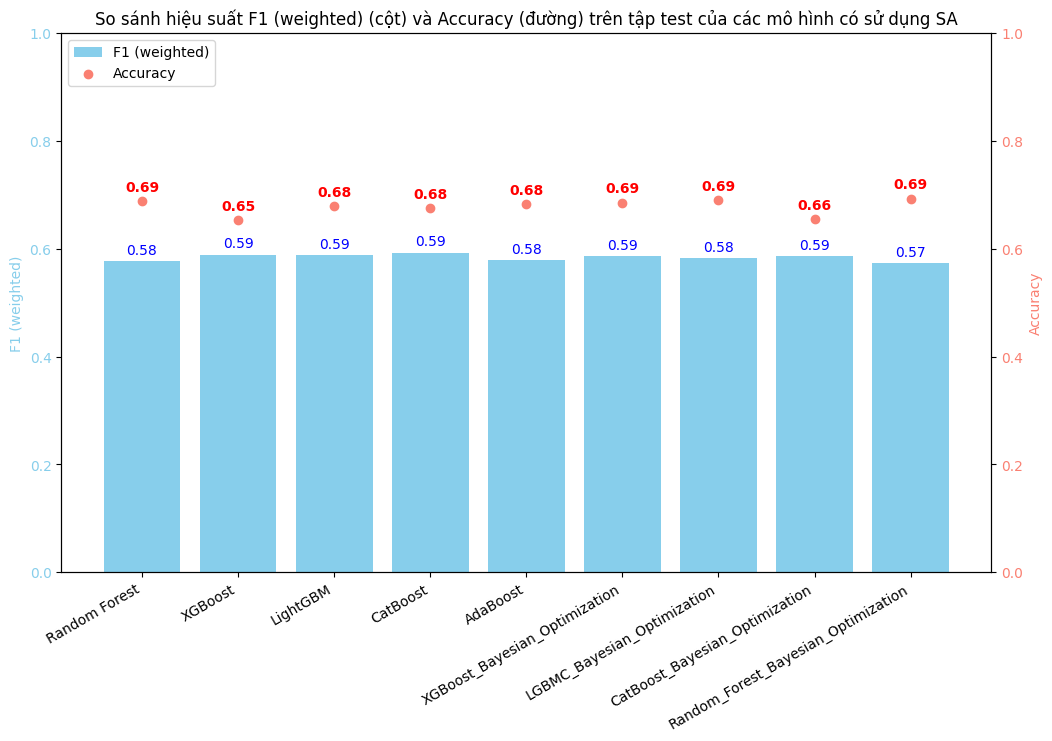

In [90]:
x = np.arange(len(model_names))  # vị trí trục x

fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ biểu đồ cột cho F1
bars = ax1.bar(x, f1_weighted, color='skyblue', label='F1 (weighted)')
ax1.set_ylabel('F1 (weighted)', color='skyblue')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.set_xticklabels(model_names, rotation=30, ha='right')  # ⬅️ thêm rotation để xoay
ax1.tick_params(axis='y', labelcolor='skyblue')


# Tạo trục y phụ để vẽ Accuracy (nếu muốn)
ax2 = ax1.twinx()  
# ax2.plot(x, acc, color='salmon', marker='o', linewidth=2, label='Accuracy')
ax2.scatter(x, acc, color='salmon', label='Accuracy', zorder=5)
ax2.set_ylabel('Accuracy', color='salmon')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='salmon')

# Thêm tiêu đề và legend
plt.title("So sánh hiệu suất F1 (weighted) (cột) và Accuracy (đường) trên tập test của các mô hình có sử dụng SA")

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

# Hiển thị giá trị F1 trên cột bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='blue')

# Hiển thị giá trị Accuracy trên từng điểm đường line
for i, acc_value in enumerate(acc):
    ax2.annotate(f'{acc_value:.2f}',
                 xy=(x[i], acc_value),
                 xytext=(0, 5),  # dời lên trên 5 points cho rõ
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red',
                 fontsize=10,
                 fontweight='bold')

plt.show()

In [27]:
X_train_with_sa = df_global_train[features]  # features = ta + fa + sa
X_test_with_sa = df_global_test[features]
y_train = df_global_train[target]
y_test = df_global_test[target]

scaler = StandardScaler()
X_train_with_sa_scaled = scaler.fit_transform(X_train_with_sa)   # Fit scaler trên train, scale train luôn
X_test_with_sa_scaled = scaler.transform(X_test_with_sa)  

In [28]:
model_names, f1_weighted_with_sa, f1_micro_with_sa, acc_with_sa, auc_scores_with_sa, roc_data_with_sa = evaluate_models(X_train_with_sa_scaled, X_test_with_sa_scaled, y_train, y_test, models)

Random Forest CV F1 (weighted): 0.5091 ± 0.0068
Random Forest Test F1 (weighted): 0.5767
Random Forest Test F1 (micro)   : 0.6882
Random Forest Test Accuracy     : 0.6882
              precision    recall  f1-score   support

           0       0.29      0.03      0.05      1164
           1       0.70      0.98      0.82      5118
           2       0.23      0.01      0.02      1098

    accuracy                           0.69      7380
   macro avg       0.41      0.34      0.30      7380
weighted avg       0.56      0.69      0.58      7380

Random Forest ROC AUC (micro ovr): 0.7951
XGBoost CV F1 (weighted): 0.5033 ± 0.0054


[09:13:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Test F1 (weighted): 0.5985
XGBoost Test F1 (micro)   : 0.6722
XGBoost Test Accuracy     : 0.6722
              precision    recall  f1-score   support

           0       0.27      0.09      0.13      1164
           1       0.71      0.93      0.81      5118
           2       0.28      0.08      0.12      1098

    accuracy                           0.67      7380
   macro avg       0.42      0.37      0.35      7380
weighted avg       0.58      0.67      0.60      7380

XGBoost ROC AUC (micro ovr): 0.8014
LightGBM CV F1 (weighted): 0.4921 ± 0.0057
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12457
[LightGBM] [Info] Number of data points in the train set: 35928, number of used features: 64
[LightGBM] [Info] Start training from score -1.522916
[LightGBM] [Info] Start tra

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.


AdaBoost Test F1 (weighted): 0.5859
AdaBoost Test F1 (micro)   : 0.6762
AdaBoost Test Accuracy     : 0.6762
              precision    recall  f1-score   support

           0       0.21      0.06      0.09      1164
           1       0.70      0.95      0.81      5118
           2       0.30      0.03      0.06      1098

    accuracy                           0.68      7380
   macro avg       0.41      0.35      0.32      7380
weighted avg       0.57      0.68      0.59      7380

AdaBoost ROC AUC (micro ovr): 0.7980
XGBoost_Bayesian_Optimization CV F1 (weighted): 0.5095 ± 0.0048


[09:20:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost_Bayesian_Optimization Test F1 (weighted): 0.5911
XGBoost_Bayesian_Optimization Test F1 (micro)   : 0.6847
XGBoost_Bayesian_Optimization Test Accuracy     : 0.6847
              precision    recall  f1-score   support

           0       0.30      0.06      0.09      1164
           1       0.70      0.96      0.81      5118
           2       0.35      0.05      0.08      1098

    accuracy                           0.68      7380
   macro avg       0.45      0.36      0.33      7380
weighted avg       0.59      0.68      0.59      7380

XGBoost_Bayesian_Optimization ROC AUC (micro ovr): 0.8111
LGBMC_Bayesian_Optimization CV F1 (weighted): 0.4779 ± 0.0076
LGBMC_Bayesian_Optimization Test F1 (weighted): 0.5856
LGBMC_Bayesian_Optimization Test F1 (micro)   : 0.6890
LGBMC_Bayesian_Optimization Test Accuracy     : 0.6890
              precision    recall  f1-score   support

           0       0.30      0.04      0.07      1164
           1       0.70      0.98      0.82      5118


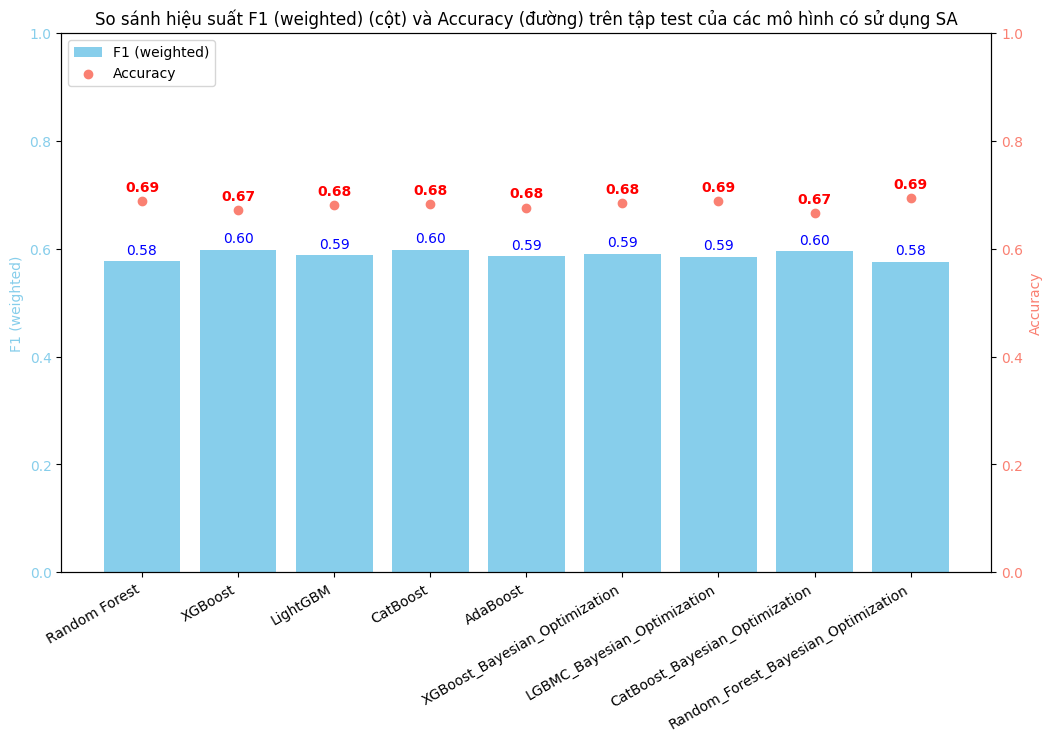

In [93]:
x = np.arange(len(model_names))  # vị trí trục x

fig, ax1 = plt.subplots(figsize=(12, 7))

# Vẽ biểu đồ cột cho F1
bars = ax1.bar(x, f1_weighted_with_sa, color='skyblue', label='F1 (weighted)')
ax1.set_ylabel('F1 (weighted)', color='skyblue')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.set_xticklabels(model_names, rotation=30, ha='right')  # ⬅️ thêm rotation để xoay
ax1.tick_params(axis='y', labelcolor='skyblue')


# Tạo trục y phụ để vẽ Accuracy (nếu muốn)
ax2 = ax1.twinx()  
# ax2.plot(x, acc_with_sa, color='salmon', marker='o', linewidth=2, label='Accuracy')
ax2.scatter(x, acc_with_sa, color='salmon', label='Accuracy', zorder=5)
ax2.set_ylabel('Accuracy', color='salmon')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='salmon')

# Thêm tiêu đề và legend
plt.title("So sánh hiệu suất F1 (weighted) (cột) và Accuracy (đường) trên tập test của các mô hình có sử dụng SA")

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

# Hiển thị giá trị F1 trên cột bar
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='blue')

# Hiển thị giá trị Accuracy trên từng điểm đường line
for i, acc_value in enumerate(acc_with_sa):
    ax2.annotate(f'{acc_value:.2f}',
                 xy=(x[i], acc_value),
                 xytext=(0, 5),  # dời lên trên 5 points cho rõ
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red',
                 fontsize=10,
                 fontweight='bold')

plt.show()

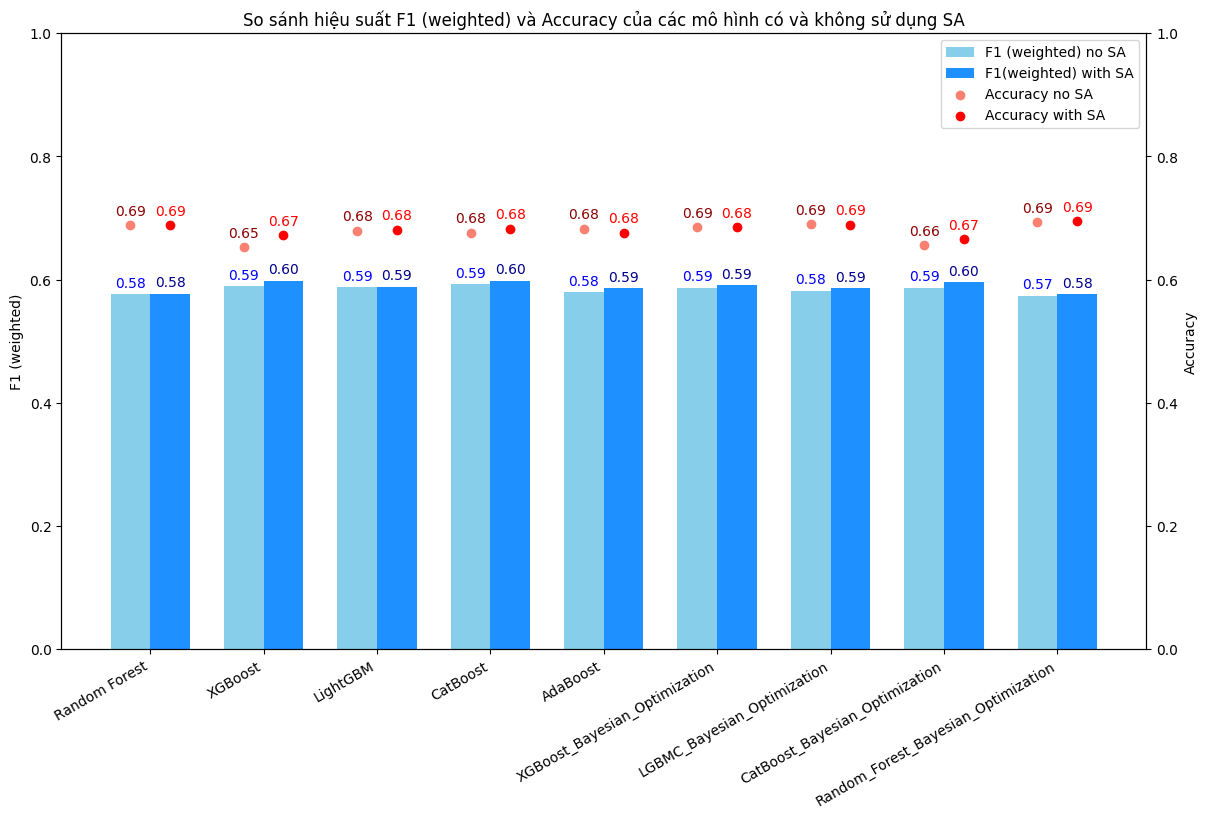

In [95]:
# Vẽ biểu đồ so sánh F1 và Accuracy giữa 2 bộ feature
x = np.arange(len(model_names))  # vị trí trục x
width = 0.35  # độ rộng cột

fig, ax1 = plt.subplots(figsize=(14, 8))

# Cột F1 no_sa và with_sa
bars1 = ax1.bar(x - width/2, f1_weighted, width, label='F1 (weighted) no SA', color='skyblue')
bars2 = ax1.bar(x + width/2, f1_weighted_with_sa, width, label='F1(weighted) with SA', color='dodgerblue')
ax1.set_ylabel('F1 (weighted)')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
ax1.set_xticklabels(model_names, rotation=30, ha='right')  # ⬅️ thêm rotation để xoay

# Trục y phụ cho Accuracy
ax2 = ax1.twinx()
line1 = ax2.scatter(x - width/2, acc, color='salmon', label='Accuracy no SA')
line2 = ax2.scatter(x + width/2, acc_with_sa, color='red', label='Accuracy with SA')
ax2.set_ylabel('Accuracy')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y')

# Gộp legend 2 trục
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper right')

# Hiển thị giá trị trên từng cột bar và điểm line
def annotate_bars(bars, ax, color='black'):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom',
                    color=color)

annotate_bars(bars1, ax1, 'blue')
annotate_bars(bars2, ax1, 'darkblue')

for i in range(len(x)):
    ax2.annotate(f'{acc[i]:.2f}',
                 xy=(x[i] - width/2, acc[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='darkred')
    ax2.annotate(f'{acc_with_sa[i]:.2f}',
                 xy=(x[i] + width/2, acc_with_sa[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 color='red')

plt.title("So sánh hiệu suất F1 (weighted) và Accuracy của các mô hình có và không sử dụng SA")
plt.show()

In [96]:
# Danh sách các mô hình
models = {
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42, class_weight='balanced'),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=1000,  # giữ nguyên như trong objective
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42,
        **best_hyperparameter_xgboot
    ),
    "LGBMC":  LGBMClassifier(
        random_state = 42,
        objective= "multiclass",
        num_class = 3,
        metric = "multi_logloss",
        verbosity = -1,
        boosting_type = "gbdt",
        **best_hyperparameter_lgbm
    ),
    "CatBoost": CatBoostClassifier(
        verbose = 0,
        loss_function = "MultiClass",
        eval_metric = "MultiClass",
        random_seed = 42,
        **best_hyperparameter_catBoost
    ),
    "Random_Forest_Bayesian_Optimization" : RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    **best_hyperparameter_rf
)

}

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
[23:41:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



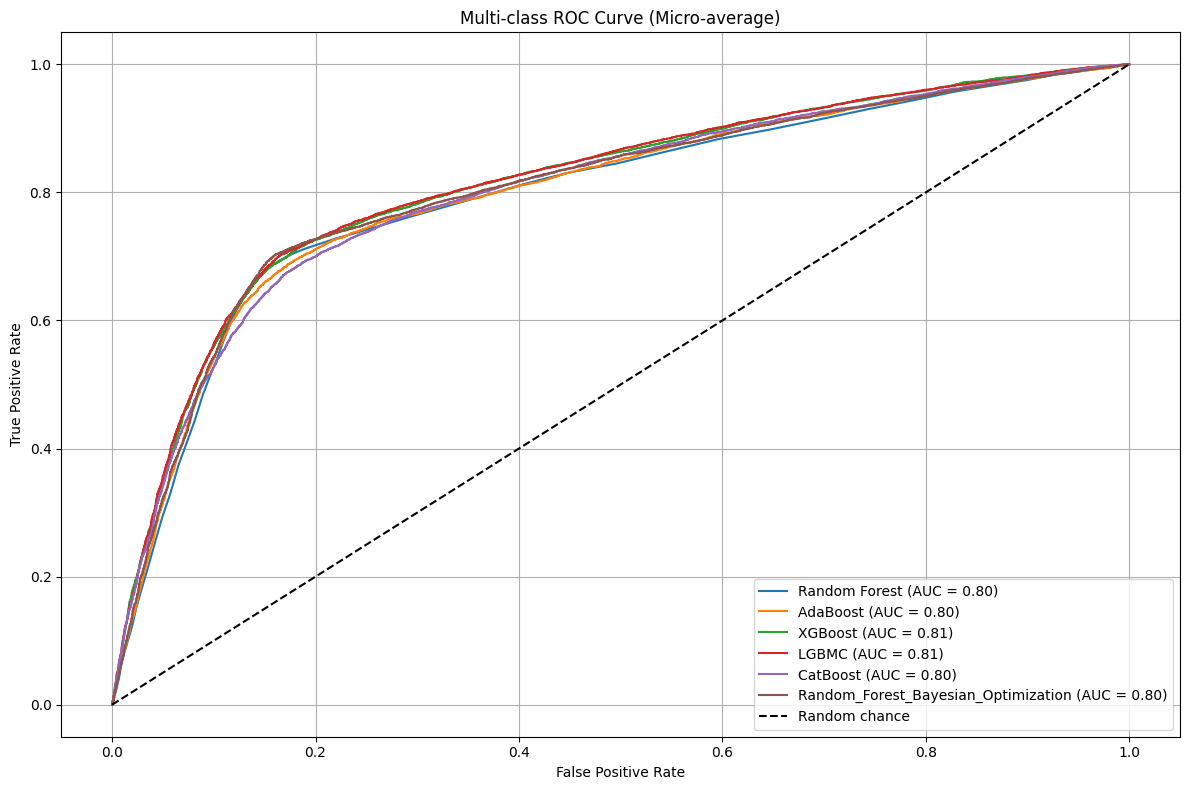

Random Forest: AUC (micro) = 0.80
AdaBoost: AUC (micro) = 0.80
XGBoost: AUC (micro) = 0.81
LGBMC: AUC (micro) = 0.81
CatBoost: AUC (micro) = 0.80
Random_Forest_Bayesian_Optimization: AUC (micro) = 0.80


In [97]:
# One-hot encode Y_test
classes = np.unique(y_test)
Y_test_bin = label_binarize(y_test, classes=classes)
n_classes = Y_test_bin.shape[1]

# Khởi tạo dict lưu trữ AUC và mô hình
roc_auc_micro = {}

plt.figure(figsize=(12, 8))

# Duyệt qua các mô hình
for name, model in models.items():
    # Train model
    model.fit(X_train_with_sa_scaled, y_train)
    
    # Dự đoán xác suất
    y_score = model.predict_proba(X_test_with_sa_scaled)

    # Tính ROC micro
    fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), np.array(y_score).ravel())
    auc_score = auc(fpr, tpr)
    roc_auc_micro[name] = auc_score

    # Vẽ đường ROC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Vẽ đường baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random chance')

# Biểu đồ
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (Micro-average)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# In kết quả AUC micro
for model_name, auc_score in roc_auc_micro.items():
    print(f"{model_name}: AUC (micro) = {auc_score:.2f}")

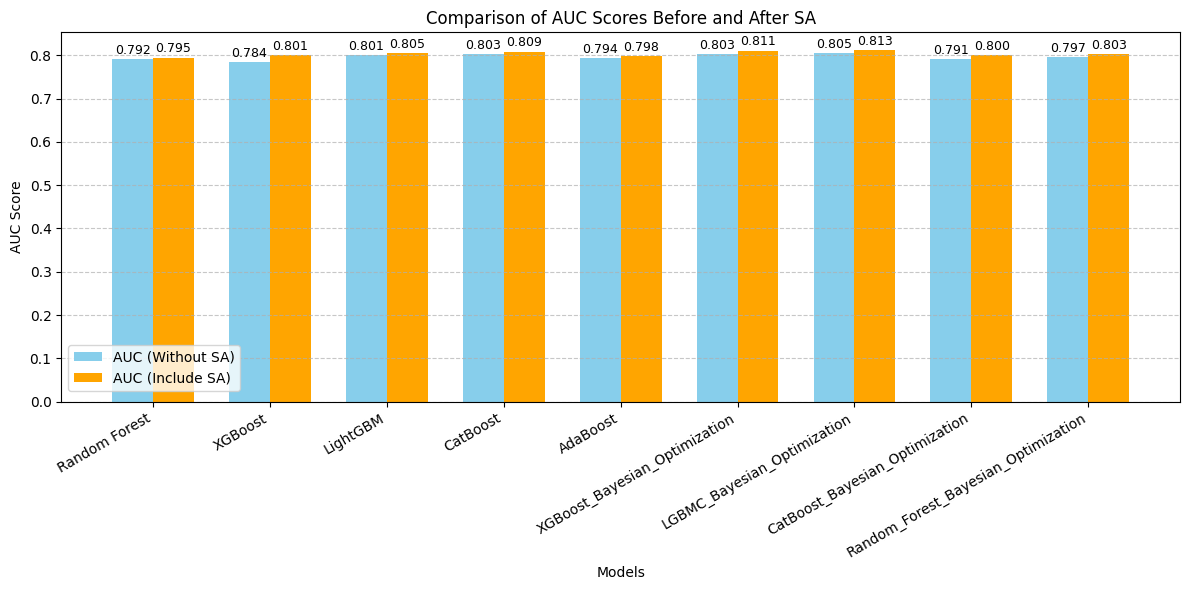

In [36]:
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cột
bars1 = plt.bar(x - width/2, auc_scores, width, label='AUC (Without SA)', color='skyblue')
bars2 = plt.bar(x + width/2, auc_scores_with_sa, width, label='AUC (Include SA)', color='orange')

# Hiển thị giá trị trên đầu mỗi cột
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=9)

# Cấu hình trục x
plt.xticks(ticks=x, labels=model_names, rotation=30, ha='right')
plt.xlabel('Models')
plt.ylabel('AUC Score')
plt.title('Comparison of AUC Scores Before and After SA')
plt.legend(loc='lower left', bbox_to_anchor=(0, 0.01))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()